# Traffic Collision Data Analysis

# Objective

In this case study, you will be working on California Traffic Collision Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to provide hands-on experience in analyzing large-scale traffic collision datasets using PySpark and AWS services. You will apply data analytics techniques to clean, transform, and explore crash data, drawing meaningful insights to support traffic safety and urban planning. Beyond understanding how big data tools optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing crash trends, identifying high-risk locations, and evaluating contributing factors to traffic incidents. Additionally, you will utilize AWS S3 to store the processed data efficiently after the ETL process, enabling scalable storage and easy retrieval for further analysis.


# Business Value:

Traffic collisions pose significant risks to public safety, requiring continuous monitoring and analysis to enhance road safety measures. Government agencies, city planners, and policymakers must leverage data-driven insights to improve infrastructure, optimize traffic management, and implement preventive measures.

In this assignment, you will analyze California traffic collision data to uncover patterns related to accident severity, location-based risks, and key contributing factors. With Apache Spark's ability to handle large datasets efficiently and AWS S3's scalable storage, transportation authorities can process vast amounts of crash data in real time, enabling faster and more informed decision-making.

As an analyst examining traffic safety trends, your task is to analyze historical crash data to derive actionable insights that can drive policy improvements and safety interventions. Your analysis will help identify high-risk areas, categorize accidents by severity and contributing factors, and store the processed data in an AWS S3 bucket for scalable and long-term storage.

By leveraging big data analytics and cloud-based storage, urban planners and traffic authorities can enhance road safety strategies, reduce accident rates, and improve public transportation planning.


# Dataset Overview

The dataset used in this analysis consists of California traffic collision data obtained from the Statewide Integrated Traffic Records System (SWITRS). It includes detailed records of traffic incidents across California, covering various attributes such as location, severity, involved parties, and contributing factors. The dataset has been preprocessed and transformed using PySpark to facilitate large-scale analysis. By leveraging Apache Spark, we ensure efficient data handling, enabling deeper insights into traffic patterns, accident trends, and potential safety improvements.

The dataset is a .sqlite file contains detailed information about traffic collisions across California and is structured into four primary tables:
- `collisions` table contains information about the collision, where it happened, what vehicles were involved.

- `parties` table contains information about the groups people involved in the collision including age, sex, and sobriety.

- `victims` table contains information about the injuries of specific people involved in the collision.

- `locations` table contains information about the geographical location and details of road intersections.

# Assignment Tasks

<ol>
    <li>
        <strong>Data Preparation</strong></br>
        The dataset consists of structured tables containing traffic collision data. Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.</br>
        Check for data consistency and ensure all columns are correctly formatted.</br>
        Apply sampling techniques if needed to extract a representative subset for analysis.</br>
        Structure and prepare the data for further processing and analysis.</br>
    </br>
    <li>
        <strong>Data Cleaning</strong></br>
            2.1 <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.</br>
            2.2 <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.</br>
            2.3 <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.</br>
    </br>
    <li>
        <strong>Exploratory Data Analysis</strong></br>
        Finding Patterns and analyze the dataset and find patterns based on the following points:
                <ul>
                3.1 Classify variables into categorical and numerical types.</br>
                3.2 Analyze the distribution of collision severity.</br>
                3.3 Examine weather conditions during collisions.</br>
                3.4 Analyze the distribution of victim ages.</br>
                3.5 Study the relationship between collision severity and the number of victims.</br>
                3.6 Analyze the correlation between weather conditions and collision severity.</br>
                3.7 Visualize the impact of lighting conditions on collision severity.</br>
                3.8 Extract and analyze weekday-wise collision trends.</br>
                3.9 Assess the number of collisions occurring on different days of the week.</br>
                3.10 Study spatial distribution of collisions by county.</br>
                3.11 Generate a scatter plot to analyze collision locations geographically.</br>
                3.12 Extract and analyze collision trends over time, including yearly, monthly, and hourly trends.</br>
</ul>
</br>
<li>
<strong>ETL Querying</strong><br>
Write PySpark SQL queries for the following:</br>
<ol>
    4.1. Load the processed dataset as CSV files in S3 bucket.</br>
    4.2. Identify the top 5 counties with the highest number of collisions.</br>
    4.3. Identify the month with the highest number of collisions.</br>
    4.4. Determine the most common weather condition during collisions.</br>
    4.5. Calculate the percentage of collisions that resulted in fatalities.</br>
    4.6. Find the most dangerous time of day for collisions.</br>
    4.7. Identify the top 5 road surface conditions with the highest collision frequency.</br>
    4.8. Analyze lighting conditions that contribute to the highest number of collisions.</br>
</ol>
</br>
<li>
<strong>Conclusion</strong></br>
Provide final insights and recommendations based on the analysis:
    <ul>
        5.1 Recommendations to improve road safety by identifying high-risk locations and peak accident times for infrastructure improvements.</br>
        5.2 Suggestions to optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting to improve road design and traffic signal timing.</br>
        5.3 Propose data-driven policy changes to enhance pedestrian and cyclist safety based on collision trends involving vulnerable road users.</br>
        5.4 Identify potential high-risk zones for proactive intervention by examining geographic collision density and historical accident data.</br>
        5.5 Assess the impact of environmental factors such as weather, road surface conditions, and lighting on accident frequency and severity.</br>
        5.6 Develop predictive models to anticipate collision hotspots and support proactive safety measures.</br>
        </ul>
        Conclude the analysis by summarizing key findings and business implications.</br>
        Explain the results of univariate, segmented univariate, and bivariate analyses in real-world traffic safety and policy terms.</br>
        Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.</br>
        </ul>
        </br>
    <li>
    <strong>Visualization Integration [Optional]</strong>
    <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
</br>
</ol>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Install Required Libraries

In [2]:
## Install the required libraries
# !pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [3]:
# Import the necessary libraries
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, to_date

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>

The dataset consists of structured tables containing traffic collision data.

Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.

Check for data consistency and ensure all columns are correctly formatted.

In [4]:
# Write code to load the data and check the schema

# Step 1: Create a Spark session
# spark = SparkSession.builder \
#     .appName("Load Traffic Data") \
#     .getOrCreate()
spark = SparkSession.builder \
    .appName("LocalSparkApp") \
    .master("local[*]") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.maxResultSize", "2g") \
    .getOrCreate()
spark.sparkContext.setLogLevel("ERROR")


# Step 2: Define file paths
case_ids_path = "sample_case_ids.csv"
collisions_path = "sample_collisions.csv"
parties_path = "sample_parties.csv"
victims_path = "sample_victims.csv"

# Step 3: Read CSV files with header and inferred schema
# Load the CSV files into DataFrames
case_ids_df = spark.read.option("header", True).csv(case_ids_path)
collisions_df = spark.read.option("header", True).csv(collisions_path)
parties_df = spark.read.option("header", True).csv(parties_path)
victims_df = spark.read.option("header", True).csv(victims_path)

# Step 4: Print schema for each DataFrame
print("Schema for sample_case_ids.csv:")
case_ids_df.printSchema()

print("\nSchema for sample_collisions.csv:")
collisions_df.printSchema()

print("\nSchema for sample_parties.csv:")
parties_df.printSchema()

print("\nSchema for sample_victims.csv:")
victims_df.printSchema()


25/05/13 01:47:26 WARN Utils: Your hostname, Piyushs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.20.10.13 instead (on interface en0)
25/05/13 01:47:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/13 01:47:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Schema for sample_case_ids.csv:
root
 |-- case_id: string (nullable = true)
 |-- db_year: string (nullable = true)


Schema for sample_collisions.csv:
root
 |-- case_id: string (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: string (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- st

#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>


In [5]:
#Display Schema & Sample Data

# Function to display schema and sample data
def display_schema_and_data(df, name):
    print(f"\nSchema for {name}:")
    df.printSchema()
    print(f"\nSample data from {name}:")
    df.show(5, truncate=False)  # Show top 5 rows without truncating columns

# Display for each dataset
display_schema_and_data(case_ids_df, "case_ids")
display_schema_and_data(collisions_df, "collisions")
display_schema_and_data(parties_df, "parties")
display_schema_and_data(victims_df, "victims")


Schema for case_ids:
root
 |-- case_id: string (nullable = true)
 |-- db_year: string (nullable = true)


Sample data from case_ids:
+----------+-------+
|case_id   |db_year|
+----------+-------+
|90017156.0|2021   |
|4078685.0 |2021   |
|90588783.0|2021   |
|3351919.0 |2018   |
|632208.0  |2018   |
+----------+-------+
only showing top 5 rows


Schema for collisions:
root
 |-- case_id: string (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true

##**2.1 Missing Values** <font color = red>[10 marks]</font> <br>


In [6]:
#Check for Missing Values
from pyspark.sql.functions import col, sum, when

# Function to count missing values for each column
def count_missing_values(df, name):
    print(f"\nMissing values in {name}:")
    df.select([sum(when(col(c).isNull() | (col(c) == ''), 1).otherwise(0)).alias(c) for c in df.columns]).show()

# Check for missing values in each dataset
count_missing_values(case_ids_df, "case_ids")
count_missing_values(collisions_df, "collisions")
count_missing_values(parties_df, "parties")
count_missing_values(victims_df, "victims")



Missing values in case_ids:
+-------+-------+
|case_id|db_year|
+-------+-------+
|      0|      0|
+-------+-------+


Missing values in collisions:


+-------+------------+----------+------------------+---------+----------+--------------------+---------------+-----------------+---------+-------------+--------------+-----------+------------+--------------+--------+---------+------------+---------+-----------------------+---------------+-----------------+-----------+--------+-------------+---------------+--------+------------------+--------------+---------------+-----------+------------------------+----------------------+-------------+------------------------+-----------+-----------------+---------------------------+-----------------+------------+----------------+--------+--------------+-------------+--------------------+-----------------+--------------------+---------------+--------------------+-------------------------------+-------------------------+-------------------+--------------------------+------------------------------+-----------------------+------------------------+----------------------+-----------------------+-----------

+---+-------+------------+----------+--------+---------+---------+--------------+-------------------+------------------------+------------------------+------------------------+----------------+------------------+------------------------+-------------------+--------------------+----------------------------+------------+------------+----------------------+-----------------------+----------------------+----------+
| id|case_id|party_number|party_type|at_fault|party_sex|party_age|party_sobriety|direction_of_travel|party_safety_equipment_1|party_safety_equipment_2|financial_responsibility|cellphone_in_use|cellphone_use_type|other_associate_factor_1|party_number_killed|party_number_injured|movement_preceding_collision|vehicle_year|vehicle_make|statewide_vehicle_type|chp_vehicle_type_towing|chp_vehicle_type_towed|party_race|
+---+-------+------------+----------+--------+---------+---------+--------------+-------------------+------------------------+------------------------+-------------------

In [7]:
from pyspark.sql.functions import col, sum, when

def drop_sparse_columns(df, name, threshold=0.5):
    total_rows = df.count()
    print(f"\nTotal rows in {name}: {total_rows}")

    # Get count of missing values per column
    missing_counts = df.select([
        sum(when(col(c).isNull() | (col(c) == ''), 1)).alias(c) for c in df.columns
    ]).collect()[0].asDict()

    # Handle None (treat as 0)
    sparse_cols = [
        col_name for col_name, missing in missing_counts.items()
        if (missing or 0) / total_rows > threshold
    ]

    print(f"Columns to drop in {name} (>{threshold*100}% missing): {sparse_cols}")

    # Drop sparse columns
    return df.drop(*sparse_cols)

# Apply to each DataFrame with a 50% threshold
case_ids_df = drop_sparse_columns(case_ids_df, "case_ids")
collisions_df = drop_sparse_columns(collisions_df, "collisions")
parties_df = drop_sparse_columns(parties_df, "parties")
victims_df = drop_sparse_columns(victims_df, "victims")



Total rows in case_ids: 942433
Columns to drop in case_ids (>50.0% missing): []

Total rows in collisions: 935791


Columns to drop in collisions (>50.0% missing): ['reporting_district', 'caltrans_county', 'caltrans_district', 'state_route', 'postmile', 'location_type', 'side_of_highway', 'pcf_violation_subsection', 'latitude', 'longitude']

Total rows in parties: 1866917


Columns to drop in parties (>50.0% missing): []

Total rows in victims: 963933
Columns to drop in victims (>50.0% missing): []


In [8]:
#Convert Data Types

from pyspark.sql.functions import col, to_date
from pyspark.sql.types import IntegerType, DoubleType

# Step 1: Convert known date columns in PySpark
def convert_date_column(df, column_name, date_format="yyyy-MM-dd"):
    if column_name in df.columns:
        df = df.withColumn(column_name, to_date(col(column_name), date_format))
        print(f"Converted '{column_name}' to date.")
    return df

# Apply to relevant columns
collisions_df = convert_date_column(collisions_df, 'collision_date')
collisions_df = convert_date_column(collisions_df, 'process_date')
victims_df = convert_date_column(victims_df, 'injury_date')

# Step 2: Convert string (object-like) columns to numeric where values are mostly numeric
def convert_string_to_numeric(df, name, threshold=0.7):
    total_rows = df.count()
    for column in df.columns:
        if df.schema[column].dataType.simpleString() == 'string':
            # Try to cast to DoubleType and see how many non-null values result
            temp_df = df.withColumn(f"temp_{column}", col(column).cast(DoubleType()))
            non_null_count = temp_df.filter(col(f"temp_{column}").isNotNull()).count()

            if non_null_count / total_rows > threshold:
                df = df.withColumn(column, col(column).cast(DoubleType()))
                print(f"Converted '{column}' to numeric in {name}.")
    return df

# Apply to parties and victims DataFrames
parties_df = convert_string_to_numeric(parties_df, "parties_df")
victims_df = convert_string_to_numeric(victims_df, "victims_df")



Converted 'collision_date' to date.
Converted 'process_date' to date.


Converted 'id' to numeric in parties_df.


Converted 'case_id' to numeric in parties_df.


Converted 'party_number' to numeric in parties_df.


Converted 'at_fault' to numeric in parties_df.


Converted 'party_age' to numeric in parties_df.


Converted 'party_number_killed' to numeric in parties_df.


Converted 'party_number_injured' to numeric in parties_df.


Converted 'vehicle_year' to numeric in parties_df.


Converted 'id' to numeric in victims_df.
Converted 'case_id' to numeric in victims_df.
Converted 'party_number' to numeric in victims_df.
Converted 'victim_age' to numeric in victims_df.


In [9]:
#Handle Missing Values

from pyspark.sql.functions import col, min, to_date
from pyspark.sql.types import IntegerType, FloatType, StringType, DateType

def handle_missing_values(df, name):
    print(f"\nHandling missing values for {name}:")

    # Fill numeric columns (int and float) with 0
    num_cols = [col_name for col_name, dtype in df.dtypes if dtype in ['int', 'double']]
    for col_name in num_cols:
        df = df.fillna({col_name: 0})
    print(f"Filled numeric columns with 0.")

    # Fill string columns with 'Unknown'
    obj_cols = [col_name for col_name, dtype in df.dtypes if dtype == 'string']
    for col_name in obj_cols:
        df = df.fillna({col_name: 'Unknown'})
    print(f"Filled text columns with 'Unknown'.")

    # Fill datetime columns with the earliest available date
    dt_cols = [col_name for col_name, dtype in df.dtypes if dtype == 'timestamp']
    for col_name in dt_cols:
        min_date = df.select(min(col(col_name))).collect()[0][0]  # Get the earliest date
        if min_date:
            df = df.fillna({col_name: min_date})
            print(f"Filled missing values in '{col_name}' with earliest date: {min_date}")

    return df

# Apply to all datasets
case_df = handle_missing_values(case_ids_df, "case_df")
collisions_df = handle_missing_values(collisions_df, "collisions_df")
parties_df = handle_missing_values(parties_df, "parties_df")
victims_df = handle_missing_values(victims_df, "victims_df")



Handling missing values for case_df:
Filled numeric columns with 0.
Filled text columns with 'Unknown'.

Handling missing values for collisions_df:
Filled numeric columns with 0.
Filled text columns with 'Unknown'.

Handling missing values for parties_df:
Filled numeric columns with 0.
Filled text columns with 'Unknown'.

Handling missing values for victims_df:
Filled numeric columns with 0.
Filled text columns with 'Unknown'.


##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


In [10]:
#Remove Duplicates

# Function to remove duplicates and print the count of duplicates removed
def remove_duplicates_and_print_count(df, name, subset_columns=None):
    # Step 1: Count the number of rows before removing duplicates
    initial_count = df.count()

    # Step 2: Remove duplicates based on all or specific columns
    if subset_columns:
        df_cleaned = df.dropDuplicates(subset_columns)
    else:
        df_cleaned = df.dropDuplicates()

    # Step 3: Count the number of rows after removing duplicates
    final_count = df_cleaned.count()

    # Step 4: Calculate and print the number of duplicates removed
    duplicates_removed = initial_count - final_count
    print(f"Removed {duplicates_removed} duplicate rows from {name}.")

    return df_cleaned

# Apply to your DataFrames
case_df = remove_duplicates_and_print_count(case_df, "case_df")
collisions_df = remove_duplicates_and_print_count(collisions_df, "collisions_df")
parties_df = remove_duplicates_and_print_count(parties_df, "parties_df")
victims_df = remove_duplicates_and_print_count(victims_df, "victims_df")


Removed 35 duplicate rows from case_df.


Removed 0 duplicate rows from collisions_df.


Removed 0 duplicate rows from parties_df.


Removed 0 duplicate rows from victims_df.


In [11]:
from pyspark.sql import functions as F

# Function to list numeric columns in a PySpark DataFrame
def list_numeric_columns(df, name):
    # Filter numeric columns by checking data type of each column
    num_cols = [col_name for col_name, dtype in df.dtypes if dtype in ['int', 'double']]
    print(f"\n{name} - Numeric columns:")
    for col in num_cols:
        print(f" - {col}")
    return num_cols

# Function to detect outliers using IQR in PySpark
def detect_outliers_iqr(df, name, columns):
    print(f"\nDetecting outliers in {name} using IQR:")

    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) using approxQuantile
        quantiles = df.approxQuantile(col, [0.25, 0.75], 0.05)  # Relative error tolerance is 0.05
        Q1 = quantiles[0]
        Q3 = quantiles[1]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers: values below the lower bound or above the upper bound
        outliers_df = df.filter((F.col(col) < lower_bound) | (F.col(col) > upper_bound))
        
        # Count outliers only if there are any
        num_outliers = outliers_df.count()
        if num_outliers > 0:
            print(f"{col}: {num_outliers} outliers")

# List of numerical columns to check for outliers
case_numeric_cols = list_numeric_columns(case_df, "case_df")
collisions_numeric_cols = list_numeric_columns(collisions_df, "collisions_df")
parties_numeric_cols = list_numeric_columns(parties_df, "parties_df")
victims_numeric_cols = list_numeric_columns(victims_df, "victims_df")

# Apply outlier detection to each DataFrame
detect_outliers_iqr(case_df, "case_df", case_numeric_cols)
detect_outliers_iqr(collisions_df, "collisions_df", collisions_numeric_cols)
detect_outliers_iqr(parties_df, "parties_df", parties_numeric_cols)
detect_outliers_iqr(victims_df, "victims_df", victims_numeric_cols)



case_df - Numeric columns:

collisions_df - Numeric columns:

parties_df - Numeric columns:
 - id
 - case_id
 - party_number
 - at_fault
 - party_age
 - party_number_killed
 - party_number_injured
 - vehicle_year

victims_df - Numeric columns:
 - id
 - case_id
 - party_number
 - victim_age

Detecting outliers in case_df using IQR:

Detecting outliers in collisions_df using IQR:

Detecting outliers in parties_df using IQR:


id: 42716 outliers


case_id: 365282 outliers


party_number: 35411 outliers


party_age: 19180 outliers


party_number_killed: 6889 outliers


party_number_injured: 15414 outliers


vehicle_year: 191265 outliers

Detecting outliers in victims_df using IQR:


id: 28343 outliers


case_id: 146372 outliers


party_number: 12976 outliers


victim_age: 9815 outliers


##**2.3 Outlier Analysis** <font color = red>[5 marks]</font> <br>


In [12]:
#Remove Outliers
from pyspark.sql import functions as F

def remove_outliers_iqr(df, name, exclude_columns=None):
    print(f"\nRemoving outliers from {name}...")
    if exclude_columns is None:
        exclude_columns = []

    # Identify numeric columns
    numeric_cols = [col for col, dtype in df.dtypes if dtype in ['int', 'double']]
    numeric_cols = [col for col in numeric_cols if col not in exclude_columns]

    clean_df = df
    total_removed = 0

    for col in numeric_cols:
        # Calculate Q1 and Q3
        q1, q3 = clean_df.approxQuantile(col, [0.25, 0.75], 0.05)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        before = clean_df.count()
        clean_df = clean_df.filter((F.col(col) >= lower) & (F.col(col) <= upper))
        after = clean_df.count()

        removed = before - after
        total_removed += removed

        if removed > 0:
            print(f" - {removed} rows removed based on column '{col}'")

    if total_removed == 0:
        print(" - No outliers removed.")

    return clean_df

# Define columns to exclude from outlier removal
exclude_case = ['case_id']
exclude_common = ['case_id', 'id']
exclude_party = ['case_id', 'id', 'party_number']
exclude_victim = ['case_id', 'id', 'party_number']

# Apply the outlier removal to all datasets
case_df = remove_outliers_iqr(case_df, "case_df", exclude_case)
collisions_df = remove_outliers_iqr(collisions_df, "collisions_df", exclude_common)
parties_df = remove_outliers_iqr(parties_df, "parties_df", exclude_party)
victims_df = remove_outliers_iqr(victims_df, "victims_df", exclude_victim)


Removing outliers from case_df...
 - No outliers removed.

Removing outliers from collisions_df...
 - No outliers removed.

Removing outliers from parties_df...


 - 19180 rows removed based on column 'party_age'


 - 6615 rows removed based on column 'party_number_killed'


 - 15053 rows removed based on column 'party_number_injured'


 - 187978 rows removed based on column 'vehicle_year'

Removing outliers from victims_df...


 - 9815 rows removed based on column 'victim_age'


#**3. Exploratory Data Analysis** <font color = red>[65 marks]</font> <br>


##**3.1.1. Data Preparation** <font color = red>[5 marks]</font> <br>

Q: Classify variables into categorical and numerical.

In [13]:
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F

numeric_like_columns = [
    'distance', 'killed_victims', 'injured_victims', 'party_count',
    'pcf_violation', 'pedestrian_collision', 'bicycle_collision',
    'motorcycle_collision', 'truck_collision', 'not_private_property',
    'severe_injury_count', 'other_visible_injury_count', 'complaint_of_pain_injury_count',
    'pedestrian_killed_count', 'pedestrian_injured_count', 'bicyclist_killed_count',
    'bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count',
    'latitude', 'longitude'
]

# Get the list of actual columns in the DataFrame
available_columns = collisions_df.columns

# Cast only if the column exists
for col in numeric_like_columns:
    if col in available_columns:
        collisions_df = collisions_df.withColumn(col, F.col(col).cast(DoubleType()))
    else:
        print(f"Skipped casting: '{col}' not found in DataFrame.")

def classify_columns(df):
    categorical_cols = [c for c, t in df.dtypes if t == 'string']
    numerical_cols = [c for c, t in df.dtypes if t in ['int', 'double']]
    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = classify_columns(collisions_df)

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Skipped casting: 'latitude' not found in DataFrame.
Skipped casting: 'longitude' not found in DataFrame.
Categorical Columns: ['case_id', 'jurisdiction', 'officer_id', 'chp_shift', 'population', 'county_city_location', 'county_location', 'special_condition', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'beat_number', 'primary_road', 'secondary_road', 'direction', 'intersection', 'weather_1', 'state_highway_indicator', 'tow_away', 'collision_severity', 'primary_collision_factor', 'pcf_violation_category', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'chp_road_type', 'statewide_vehicle_type_at_fault', 'chp_vehicle_type_at_fault', 'collision_time']
Numerical Columns: ['distance', 'killed_victims', 'injured_victims', 'party_count', 'pcf_violation', 'pedestrian_collision', 'bicycle_collision', 'motorcycle_collision', 'truck_collision', 'not_private_property', 'severe_injury_count'

In [14]:
# Encode Categorical Variables
from pyspark.sql import functions as F
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Step 1: Classify Columns
def classify_columns(df):
    categorical_cols = [col_name for col_name, dtype in df.dtypes if dtype == 'string']
    numerical_cols = [col_name for col_name, dtype in df.dtypes if dtype in ['int', 'double']]
    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = classify_columns(collisions_df)

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

# Step 2: Encode Categorical Columns using StringIndexer
def encode_categorical_columns(df, categorical_cols, important_cols=None):
    indexers = []
    for col in categorical_cols:
        if important_cols and col in important_cols:
            print(f"Encoding important column: {col}")
        indexer = StringIndexer(inputCol=col, outputCol=col + "_indexed")
        indexers.append(indexer)
    
    # Create a pipeline to apply all StringIndexers
    pipeline = Pipeline(stages=indexers)
    
    # Fit and transform the data
    df_transformed = pipeline.fit(df).transform(df)
    
    print(f"Encoded {len(categorical_cols)} categorical columns.")
    return df_transformed

# Ensure 'collision_severity' is included as an important column
if 'collision_severity' not in categorical_cols:
    categorical_cols.append('collision_severity')

# Apply encoding to collisions_df
collisions_df_transformed = encode_categorical_columns(collisions_df, categorical_cols, important_cols=['collision_severity'])

# Show the transformed dataframe
collisions_df_transformed.show()



Categorical Columns:
['case_id', 'jurisdiction', 'officer_id', 'chp_shift', 'population', 'county_city_location', 'county_location', 'special_condition', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'beat_number', 'primary_road', 'secondary_road', 'direction', 'intersection', 'weather_1', 'state_highway_indicator', 'tow_away', 'collision_severity', 'primary_collision_factor', 'pcf_violation_category', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'chp_road_type', 'statewide_vehicle_type_at_fault', 'chp_vehicle_type_at_fault', 'collision_time']

Numerical Columns:
['distance', 'killed_victims', 'injured_victims', 'party_count', 'pcf_violation', 'pedestrian_collision', 'bicycle_collision', 'motorcycle_collision', 'truck_collision', 'not_private_property', 'severe_injury_count', 'other_visible_injury_count', 'complaint_of_pain_injury_count', 'pedestrian_killed_count', 'pedestrian

Encoded 34 categorical columns.


+--------------------+------------+----------+--------------+----------------+--------------------+---------------+-----------------+-------------------+----------------+--------------+-----------+--------------------+--------------------+--------+---------+------------+---------+-----------------------+--------+--------------------+--------------+---------------+-----------+------------------------+----------------------+-------------+---------------+-----------------+---------------------------+--------------------+------------+----------------+--------------------+--------------+-------------+--------------------+-----------------+--------------------+---------------+--------------------+-------------------------------+-------------------------+-------------------+--------------------------+------------------------------+-----------------------+------------------------+----------------------+-----------------------+-------------------------+--------------------------+--------------+

In [15]:
# Reordering & Renaming Columns

# ----------------------------
# 1. Reorder columns in collisions_df
# ----------------------------
collisions_columns = collisions_df.columns

# Preferred front columns
front = ['case_id', 'collision_date', 'process_date', 'collision_severity', 'injured_victims', 'killed_victims']
front = [col for col in front if col in collisions_columns]  # Keep only existing columns

# Get remaining columns
rest = [col for col in collisions_columns if col not in front]

# Reorder
collisions_df = collisions_df.select(front + rest)

# ----------------------------
# 2. Rename selected columns in victims_df
# ----------------------------
rename_mapping = {
    'victim_sex': 'gender',
    'victim_age': 'age',
    'victim_degree_of_injury': 'injury_severity',
    'victim_role': 'role'
}

for old_col, new_col in rename_mapping.items():
    if old_col in victims_df.columns:
        victims_df = victims_df.withColumnRenamed(old_col, new_col)

# ----------------------------
# 3. Print schemas
# ----------------------------
print("\nFinal Schema: collisions_df")
collisions_df.printSchema()

print("\nFinal Schema: victims_df")
victims_df.printSchema()



Final Schema: collisions_df
root
 |-- case_id: string (nullable = false)
 |-- collision_date: date (nullable = true)
 |-- process_date: date (nullable = true)
 |-- collision_severity: string (nullable = false)
 |-- injured_victims: double (nullable = true)
 |-- killed_victims: double (nullable = true)
 |-- jurisdiction: string (nullable = false)
 |-- officer_id: string (nullable = false)
 |-- chp_shift: string (nullable = false)
 |-- population: string (nullable = false)
 |-- county_city_location: string (nullable = false)
 |-- county_location: string (nullable = false)
 |-- special_condition: string (nullable = false)
 |-- beat_type: string (nullable = false)
 |-- chp_beat_type: string (nullable = false)
 |-- chp_beat_class: string (nullable = false)
 |-- beat_number: string (nullable = false)
 |-- primary_road: string (nullable = false)
 |-- secondary_road: string (nullable = false)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = false)
 |-- intersection: 

In [16]:
# Final cleaned data
def print_df_shape(df, name):
    num_rows = df.count()
    num_cols = len(df.columns)
    print(f"{name} - Rows: {num_rows}, Columns: {num_cols}")

# Print shapes for each cleaned DataFrame
print_df_shape(case_df, "case_df")
print_df_shape(collisions_df, "collisions_df")
print_df_shape(parties_df, "parties_df")
print_df_shape(victims_df, "victims_df")


case_df - Rows: 942398, Columns: 2


collisions_df - Rows: 935791, Columns: 55


parties_df - Rows: 1638091, Columns: 24


victims_df - Rows: 954118, Columns: 11


Loading the Final Cleaned Dataset into S3 Bucket

##**3.1.2. Analyze the distribution of collision severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of collision severity.

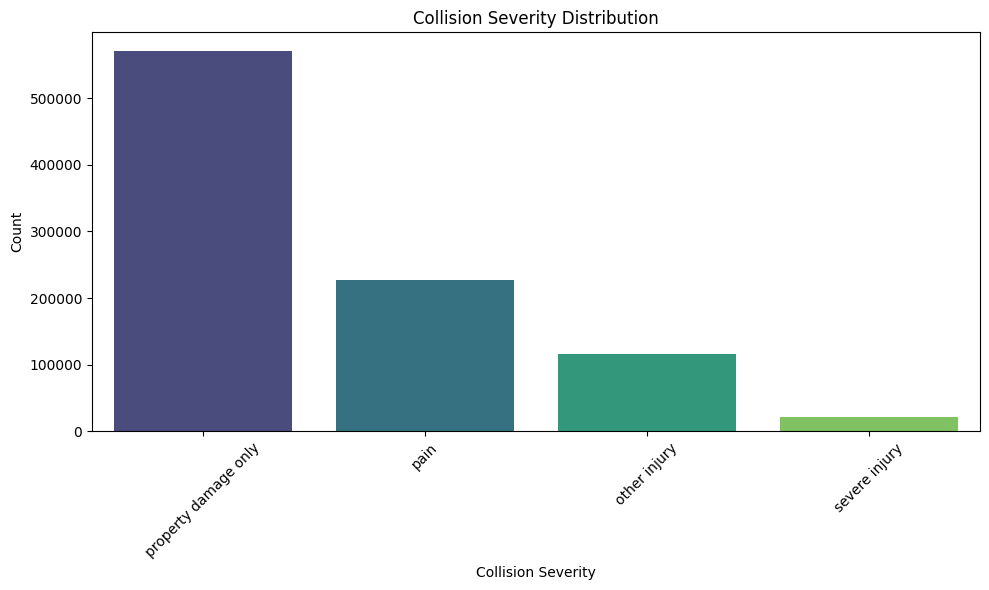

In [17]:
# Univariate Analysis

# Collision Severity Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas
severity_counts_df = collisions_df.groupBy("collision_severity").count().orderBy("count", ascending=False)
severity_counts_pd = severity_counts_df.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=severity_counts_pd,
    x='collision_severity',
    y='count',
    hue='collision_severity',
    legend=False,  # Hide redundant legend
    palette='viridis'
)
plt.title("Collision Severity Distribution")
plt.xlabel("Collision Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**3.1.3. Weather conditions during collisions.** <font color = red>[5 marks]</font> <br>

Q: Examine weather conditions during collisions.

Weather Condition Counts (Spark):


+---------+------+
|weather_1|count |
+---------+------+
|clear    |769927|
|cloudy   |122155|
|raining  |32341 |
|Unknown  |4626  |
|fog      |3901  |
|snowing  |1370  |
|other    |1081  |
|wind     |390   |
+---------+------+



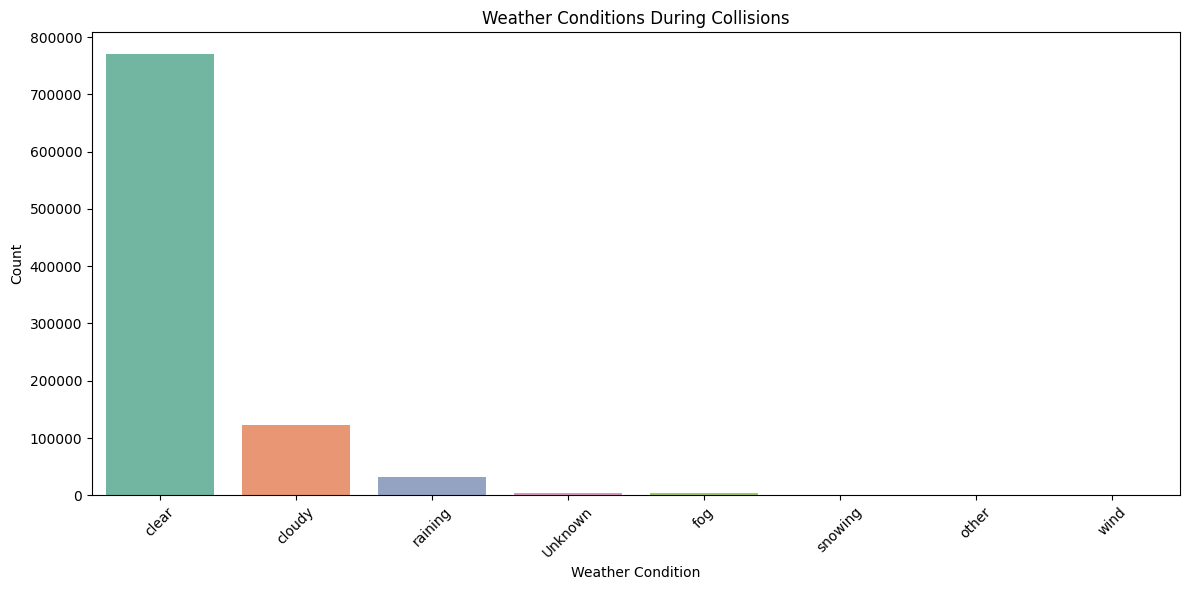

In [18]:
# Weather Conditions During Collisions
weather_counts_df = collisions_df.groupBy("weather_1") \
                                 .count() \
                                 .orderBy("count", ascending=False)

print("Weather Condition Counts (Spark):")
weather_counts_df.show(truncate=False)

# Convert to Pandas
weather_counts_pd = weather_counts_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_counts_pd,
            x='weather_1',
            y='count',
            hue='weather_1',
            palette='Set2',
            legend=False)

plt.title("Weather Conditions During Collisions")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**3.1.4. Victime Age Distribution.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of victim ages.

+----+
|age |
+----+
|3.0 |
|5.0 |
|34.0|
|19.0|
|46.0|
|26.0|
|7.0 |
|5.0 |
|46.0|
|14.0|
|10.0|
|33.0|
|23.0|
|43.0|
|0.0 |
|58.0|
|27.0|
|8.0 |
|50.0|
|9.0 |
+----+
only showing top 20 rows



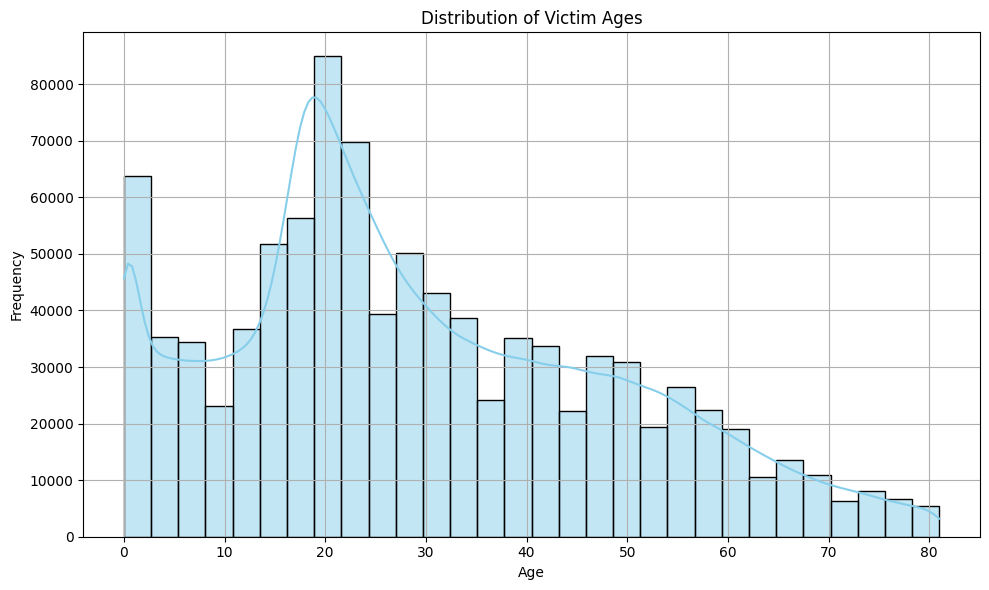

In [19]:
# Distribution of Victim Ages
victim_ages_df = victims_df.select("age").dropna()
victim_ages_df.show(truncate=False)
# Convert to Pandas
victim_ages_pd = victim_ages_df.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(victim_ages_pd["age"], bins=30, kde=True, color='skyblue')

plt.title("Distribution of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


##**3.1.5. Collision Severity vs Number of Victims.** <font color = red>[5 marks]</font> <br>

Q: Study the relationship between collision severity and the number of victims.

/var/folders/7j/_m_9xq396fgd3f54cxf8bszr0000gn/T/ipykernel_20042/2316426438.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=victims_by_severity_pd, x='collision_severity', y='total_victims', palette='viridis')


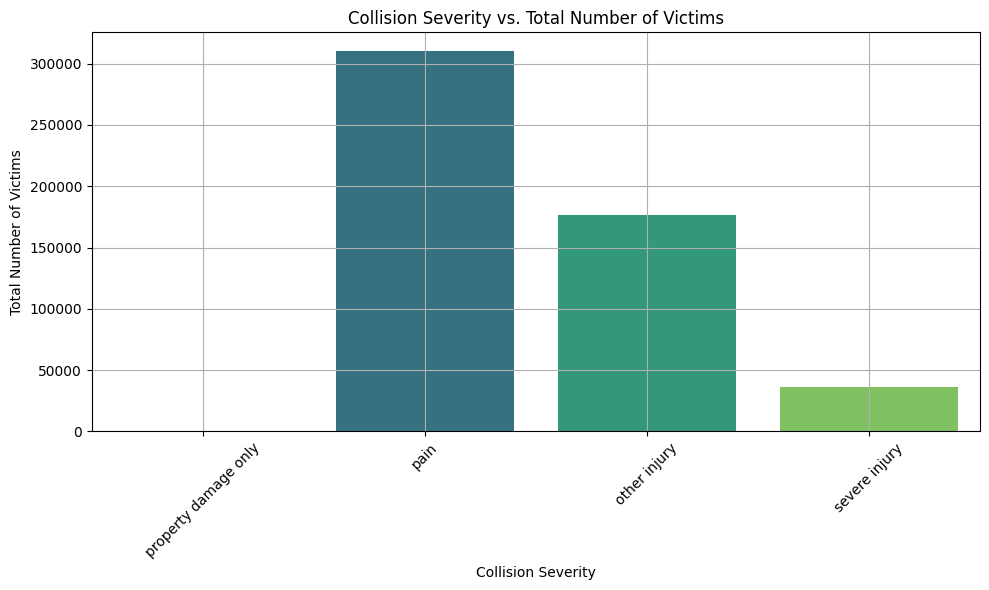

In [20]:
# Bivariate Analysis

# Collision Severity vs. Number of Victims
victims_by_severity_df = collisions_df.groupBy("collision_severity").agg(
    F.sum("injured_victims").alias("total_injured_victims"),
    F.sum("killed_victims").alias("total_killed_victims")
)
victims_by_severity_df = victims_by_severity_df.withColumn(
    "total_victims", victims_by_severity_df["total_injured_victims"] + victims_by_severity_df["total_killed_victims"]
)

# Convert to Pandas
victims_by_severity_pd = victims_by_severity_df.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=victims_by_severity_pd, x='collision_severity', y='total_victims', palette='viridis')

# Step 5: Title and labels
plt.title("Collision Severity vs. Total Number of Victims")
plt.xlabel("Collision Severity")
plt.ylabel("Total Number of Victims")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Step 6: Show the plot
plt.show()


##**3.1.6. Weather Conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the correlation between weather conditions and collision severity.

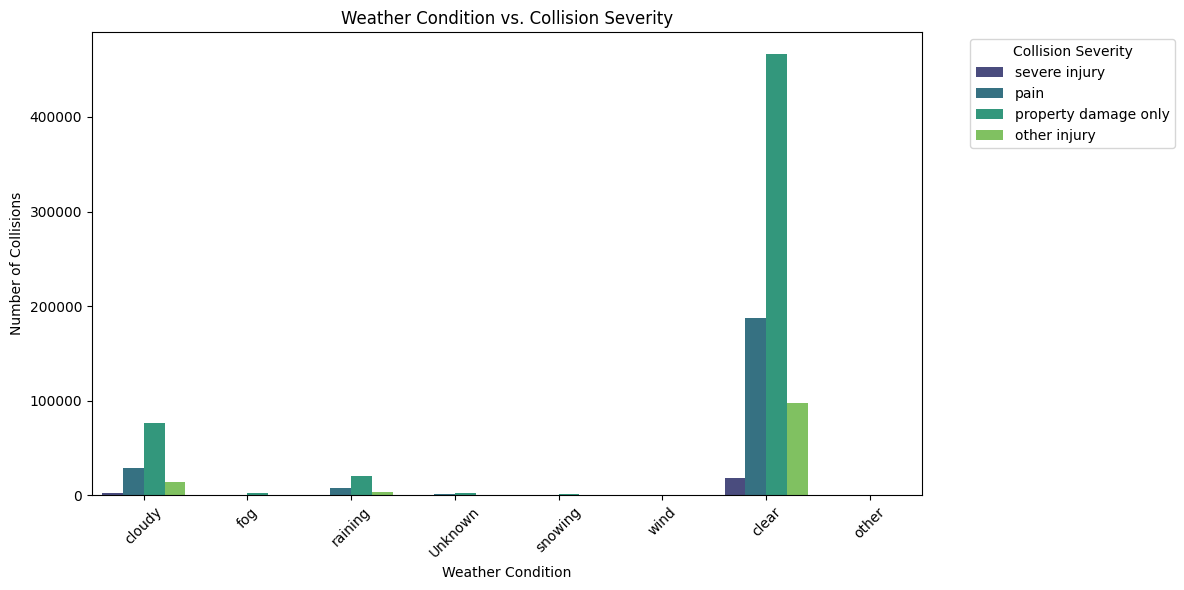

In [21]:
# Weather vs. Collision Severity
weather_vs_severity_df = collisions_df.groupBy("weather_1", "collision_severity").count()

# Convert to Pandas
weather_vs_severity_pd = weather_vs_severity_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_vs_severity_pd, x='weather_1', y='count', hue='collision_severity', palette='viridis')

# Step 4: Title and labels
plt.title("Weather Condition vs. Collision Severity")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.legend(title="Collision Severity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Step 5: Show the plot
plt.show()

##**3.1.7. Lighting conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q:Visualize the impact of lighting conditions on collision severity.

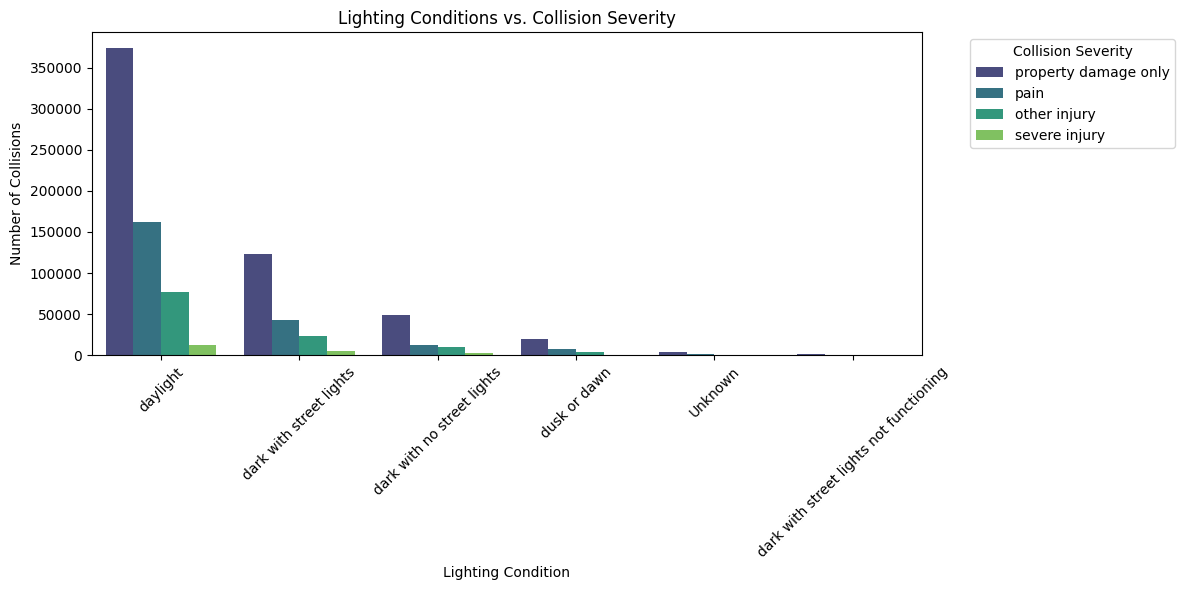

In [22]:
# Lighting Conditions vs. Collision Severity
lighting_severity_df = collisions_df.groupBy("lighting", "collision_severity").count()

# Convert to Pandas
lighting_severity_pd = lighting_severity_df.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=lighting_severity_pd,
    x="lighting",
    y="count",
    hue="collision_severity",
    palette="viridis"
)

# Aesthetics
plt.title("Lighting Conditions vs. Collision Severity")
plt.xlabel("Lighting Condition")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.legend(title="Collision Severity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

##**3.1.8. Weekday-Wise Collision Trends.** <font color = red>[7 marks]</font> <br>

Q: Extract and analyze weekday-wise collision trends.

/var/folders/7j/_m_9xq396fgd3f54cxf8bszr0000gn/T/ipykernel_20042/3409938442.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_pd, x="weekday", y="count", palette="crest")


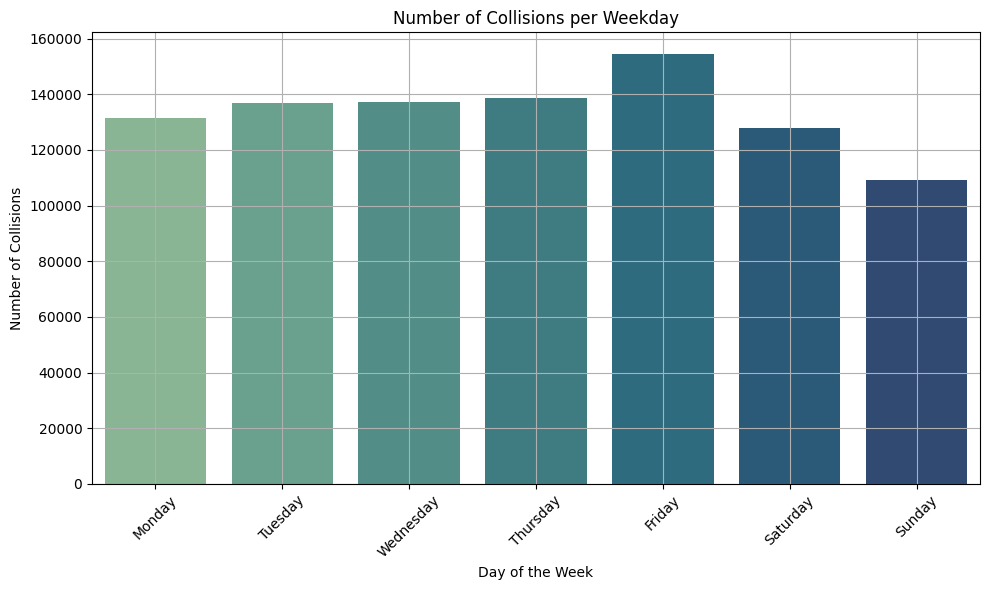

In [23]:
# Extract the weekday
from pyspark.sql.functions import col, to_date, date_format

# Step 1: Ensure date is in date format
collisions_df = collisions_df.withColumn("collision_date", to_date("collision_date"))

# Step 2: Extract weekday name
collisions_df = collisions_df.withColumn("weekday", date_format("collision_date", "EEEE"))

# Step 3: Group by weekday and count
weekday_df = collisions_df.groupBy("weekday").count()

# Step 4: Convert to Pandas
weekday_pd = weekday_df.toPandas()

# Step 5: Order weekdays correctly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_pd["weekday"] = pd.Categorical(weekday_pd["weekday"], categories=weekday_order, ordered=True)
weekday_pd = weekday_pd.sort_values("weekday")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_pd, x="weekday", y="count", palette="crest")

plt.title("Number of Collisions per Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##**3.1.9. Spatial Distribution of Collisions.** <font color = red>[7 marks]</font> <br>

Q: Study spatial distribution of collisions by county.

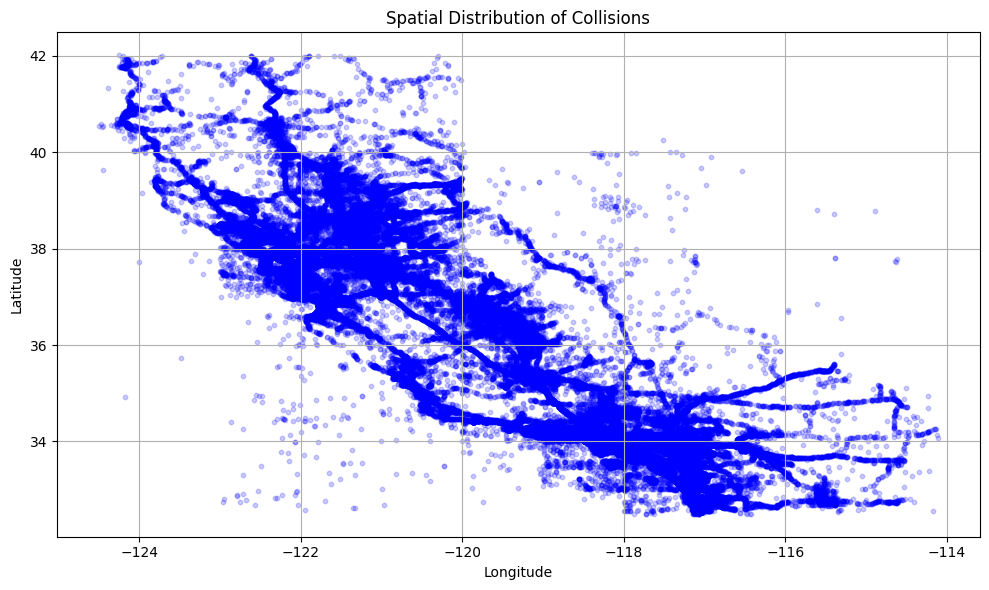


Total valid coordinates plotted: 266742


In [24]:
# Spatial Analysis
from pyspark.sql.functions import col

# Collision Density by County
# Step 1: Ensure the columns exist
collisions_df_copy = spark.read.option("header", True).csv(collisions_path)

collisions_df_copy = (
    collisions_df_copy
    .withColumn("latitude", col("latitude").cast(DoubleType()))
    .withColumn("longitude", col("longitude").cast(DoubleType()))
)

# Step 2: Filter out invalid/missing coordinates in PySpark
map_df = collisions_df_copy.filter(
    (col("latitude").isNotNull()) & (col("longitude").isNotNull()) &
    (col("latitude") != 0) & (col("longitude") != 0)
)
map_pd = map_df.select("latitude", "longitude").toPandas()

# Plot the map
plt.figure(figsize=(10, 6))
plt.scatter(map_pd["longitude"], map_pd["latitude"], alpha=0.2, s=10, c='blue')

plt.title("Spatial Distribution of Collisions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print number of plotted points
print(f"\nTotal valid coordinates plotted: {len(map_pd)}")

##**3.1.10. Collision Analysis by Geography.** <font color = red>[6 marks]</font> <br>

Q: Generate a scatter plot to analyze collision locations geographically.

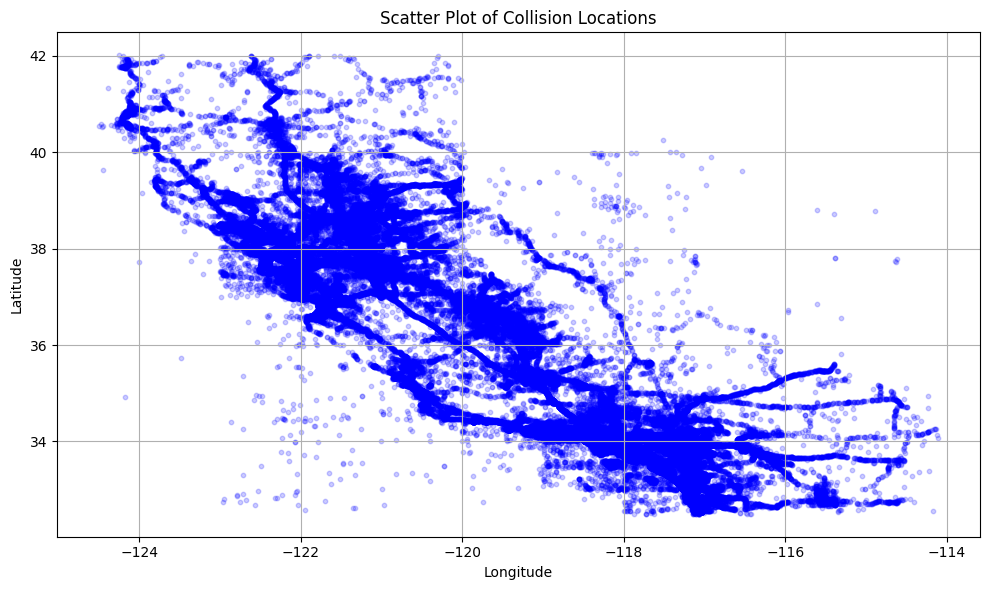


Total valid coordinates plotted: 266742


In [26]:
# Scatter Plot of Collision Locations
collisions_df_copy = (
    collisions_df_copy
    .withColumn("latitude", col("latitude").cast(DoubleType()))
    .withColumn("longitude", col("longitude").cast(DoubleType()))
)


# Convert PySpark DataFrame to Pandas, handling potential missing values
map_df = collisions_df_copy.filter(
    (col("latitude").isNotNull()) & (col("longitude").isNotNull()) &
    (col("latitude") != 0) & (col("longitude") != 0)
)
map_pd = map_df.select("latitude", "longitude").toPandas()

# Convert to numeric (if needed) and handle invalid data

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(map_pd["longitude"], map_pd["latitude"], alpha=0.2, s=10, c='blue')

plt.title("Scatter Plot of Collision Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Optional count of valid records
print(f"\nTotal valid coordinates plotted: {len(map_pd)}")

##**3.1.11. Collision Trends Over Time.** <font color = red>[10 marks]</font> <br>

Extract and analyzing collision trends over time.

/var/folders/7j/_m_9xq396fgd3f54cxf8bszr0000gn/T/ipykernel_20042/450635624.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=date_stats_pd, x="month", palette="Blues")


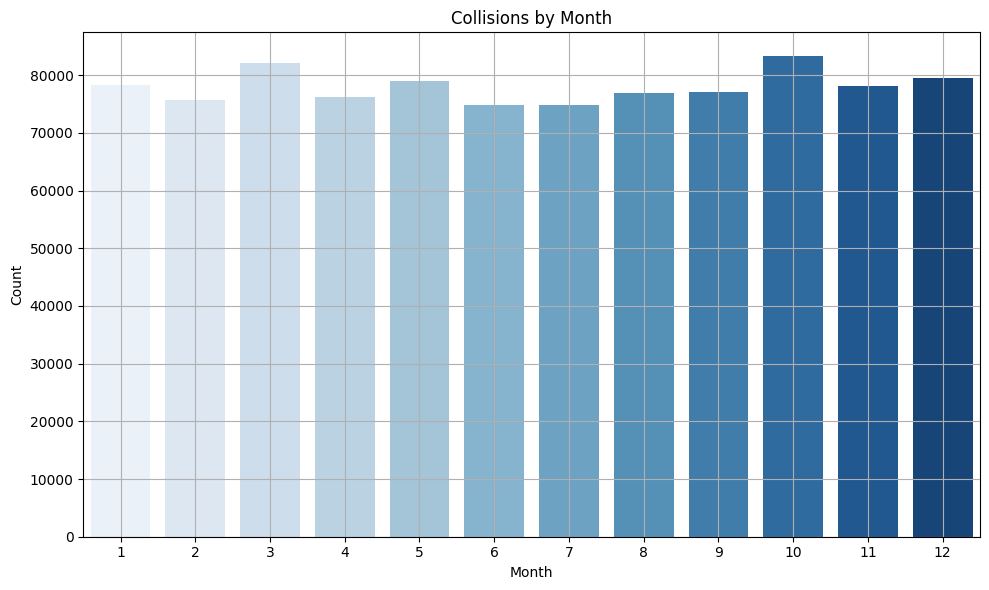

In [29]:
from pyspark.sql.functions import year, month, hour, to_timestamp, col

# Extract year and month from collision_date
collisions_df = collisions_df.withColumn("collision_date", to_date(col("collision_date")))

collisions_df = collisions_df.withColumn("year", year("collision_date"))
collisions_df = collisions_df.withColumn("month", month("collision_date"))

# Plot
date_stats_pd = collisions_df.select("year", "month").dropna().toPandas()

# Plotting collisions by month
plt.figure(figsize=(10, 6))
sns.countplot(data=date_stats_pd, x="month", palette="Blues")

plt.title("Collisions by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

Q: Analyze yearly, monthly and hourly trends in collisions.

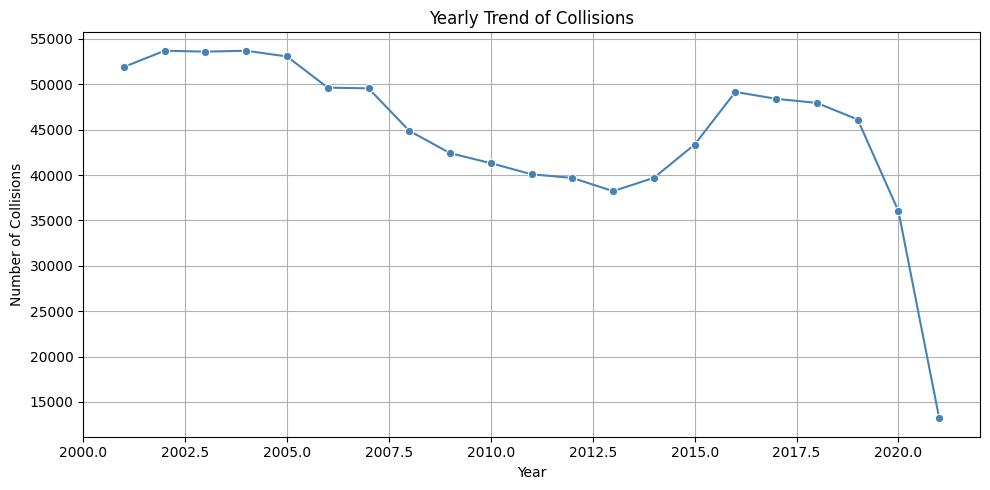

In [30]:
# Yearly Trend of Collisions
collisions_df = collisions_df.withColumn("collision_datetime", to_timestamp("collision_date"))
collisions_df = (
    collisions_df
    .withColumn("year", year("collision_datetime"))
    .withColumn("month", month("collision_datetime"))
    .withColumn("hour", hour(to_timestamp("collision_time", "HHmm")))
)
yearly_df = collisions_df.groupBy("year").count().orderBy("year")
yearly_pd = yearly_df.toPandas()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_pd, x="year", y="count", marker="o", color="steelblue")
plt.title("Yearly Trend of Collisions")
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/7j/_m_9xq396fgd3f54cxf8bszr0000gn/T/ipykernel_20042/88835622.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_pd, x="month", y="count", palette="viridis")


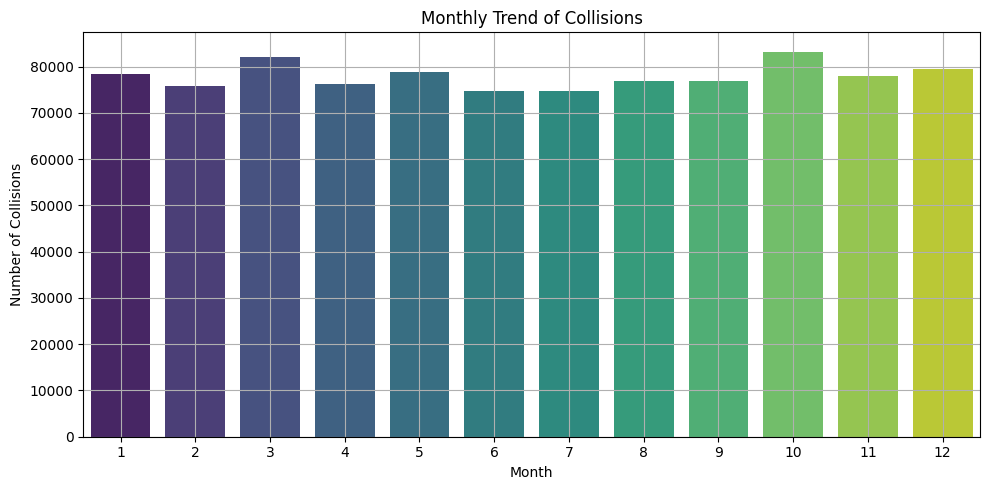

In [31]:
# Monthly Trend of Collisions
monthly_df = collisions_df.groupBy("month").count().orderBy("month")
monthly_pd = monthly_df.toPandas()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_pd, x="month", y="count", palette="viridis")
plt.title("Monthly Trend of Collisions")
plt.xlabel("Month")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.tight_layout()
plt.show()

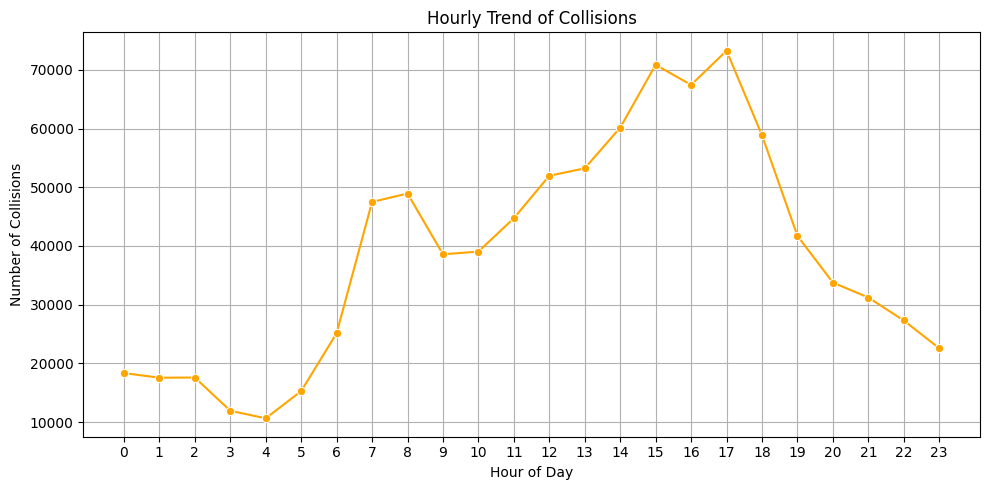

In [40]:
# Hourly Trend of Collisions
from pyspark.sql.functions import col, hour, to_timestamp

hourly_df = collisions_df.withColumn("collision_time", to_timestamp("collision_time", "HH:mm:ss"))
hourly_df = hourly_df.withColumn("hour", hour("collision_time"))
hourly_df = hourly_df.groupBy("hour").count().orderBy("hour")
hourly_pd = hourly_df.toPandas()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_pd, x="hour", y="count", marker="o", color="orange")
plt.title("Hourly Trend of Collisions")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Collisions")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

#**4. ETL Querying** <font color = red>[35 marks]</font> <br>

##**4.1 Loading the Dataset** <font color = red>[1 marks]</font> <br>

Q: Load the processed dataset as CSV files in S3 bucket.

In [45]:
# Write your query here

# Paths to the CSV files
sample_case_ids_path = "sample_case_ids.csv"
sample_collisions_path = "sample_collisions.csv"
sample_parties_path = "sample_parties.csv"
sample_victims_path = "sample_victims.csv"

# Load the data into PySpark DataFrames
case_ids_df = spark.read.option("header", "true").csv(sample_case_ids_path)
collisions_df = spark.read.option("header", "true").csv(sample_collisions_path)
parties_df = spark.read.option("header", "true").csv(sample_parties_path)
victims_df = spark.read.option("header", "true").csv(sample_victims_path)

# Convert relevant columns to appropriate data types
collisions_df = collisions_df.withColumn("latitude", col("latitude").cast("double")) \
                             .withColumn("longitude", col("longitude").cast("double")) \
                             .withColumn("killed_victims", col("killed_victims").cast("integer")) \
                             .withColumn("injured_victims", col("injured_victims").cast("integer"))

# If there are any nulls or invalid values, we can filter them
collisions_df = collisions_df.filter(col("latitude").isNotNull() & col("longitude").isNotNull())

# Example: Convert case_id to string (if not already) and filter out invalid case_ids from other DataFrames
case_ids_df = case_ids_df.withColumn("case_id", col("case_id").cast("string"))
parties_df = parties_df.withColumn("case_id", col("case_id").cast("string"))
victims_df = victims_df.withColumn("case_id", col("case_id").cast("string"))


# Join all DataFrames on case_id
merged_df = collisions_df.join(case_ids_df, on="case_id", how="left") \
                         .join(parties_df, on="case_id", how="left") \
                         .join(victims_df, on="case_id", how="left")


# Convert PySpark DataFrame to Pandas DataFrame for SQLite insertion
merged_df = merged_df.drop('id')
merged_df = merged_df.drop('party_number')
merged_pd = merged_df.toPandas()

# Connect to SQLite database (it will create a new database if it doesn't exist)
conn = sqlite3.connect('collisions_data.db')

# Write the Pandas DataFrame to SQLite
merged_pd.to_sql('merged_collisions', conn, if_exists='replace', index=False)

# Query the SQLite database to verify data insertion
query = "SELECT * FROM merged_collisions LIMIT 5"
result = pd.read_sql(query, conn)
print(result)

# Close the SQLite connection
conn.close()

print("Data saved successfully to SQLite!")

     case_id jurisdiction officer_id reporting_district       chp_shift  \
0  2741365.0       9252.0      13432               None  1400 thru 2159   
1  2744163.0       9252.0      12569               None  0600 thru 1359   
2  2784170.0       9252.0      13823               None  0600 thru 1359   
3  2784212.0       9252.0      15342               None  1400 thru 2159   
4  2794932.0       9252.0      12149               None  0600 thru 1359   

       population county_city_location county_location special_condition  \
0  unincorporated                 3400      sacramento               0.0   
1  unincorporated                 3400      sacramento               0.0   
2  unincorporated                 3400      sacramento               0.0   
3  unincorporated                 3400      sacramento               0.0   
4  unincorporated                 3400      sacramento               0.0   

             beat_type  ... chp_vehicle_type_towed party_race victim_role  \
0    chp state 

## **4.2. Top 5 Counties** <font color = red>[4 marks]</font> <br>

Q: Identify the top 5 counties with the highest number of collisions.

In [50]:
# Query: Identify the top 5 counties with the most collisions

# Connect to the SQLite database
conn = sqlite3.connect('collisions_data.db')

query = """
SELECT county_location, COUNT(*) as collision_count
FROM merged_collisions
GROUP BY county_location
ORDER BY collision_count DESC
LIMIT 5;
"""

# Execute and show results
top_counties = pd.read_sql(query, conn)
print(top_counties)

# Close connection
conn.close()


  county_location  collision_count
0     los angeles            70790
1          orange            19639
2       riverside            17292
3       san diego            16351
4  san bernardino            13654


##**4.3. Month with Highest Collisions** <font color = red>[5 marks]</font> <br>

Q. Identify the month with the highest number of collisions.

In [51]:
# Query: Find the month with the highest number of collisions

# Connect to the SQLite database
conn = sqlite3.connect('collisions_data.db')

query = """
SELECT 
    strftime('%m', collision_date) AS month,
    COUNT(*) AS collision_count
FROM merged_collisions
GROUP BY month
ORDER BY collision_count DESC
LIMIT 1;
"""

# Execute the query and store the results in a DataFrame
result = pd.read_sql(query, conn)

# Display the result to verify
print(result)

# Close the SQLite connection
conn.close()


  month  collision_count
0    10            24801


##**4.4. Weather Conditions with Highest Collisions.** <font color = red>[5 marks]</font> <br>

Q. Determine the most common weather condition during collisions.

In [52]:
# Query: Find the most common weather condition during collisions

conn = sqlite3.connect('collisions_data.db')

# SQL query to get the most common weather condition
query = """
SELECT weather_1, COUNT(*) as collision_count
FROM merged_collisions
GROUP BY weather_1
ORDER BY collision_count DESC
LIMIT 1;
"""

# Execute and display the result
common_weather = pd.read_sql(query, conn)
print(common_weather)

# Close the connection
conn.close()

  weather_1  collision_count
0     clear           223997


##**4.5. Fatal Collisions.** <font color = red>[5 marks]</font> <br>

Q. Calculate the percentage of collisions that resulted in fatalities.

In [53]:
# Query: Determine the percentage of collisions that resulted in fatalities
conn = sqlite3.connect('collisions_data.db')

query = """
SELECT 
    ROUND(100.0 * SUM(CASE WHEN CAST(killed_victims AS INTEGER) > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS fatality_percentage
FROM merged_collisions;
"""

# Execute and display the result
fatality_percentage = pd.read_sql(query, conn)
print(fatality_percentage)

# Close the connection
conn.close()

   fatality_percentage
0                  0.0


##**4.6. Dangerous Time for Collisions.** <font color = red>[5 marks]</font> <br>

Q. Find the most dangerous time of day for collisions.

In [54]:
# Query: Find the most dangerous time of day for collisions
conn = sqlite3.connect('collisions_data.db')


query = """
SELECT 
    SUBSTR(collision_time, 1, 2) AS hour,
    COUNT(*) AS collision_count
FROM merged_collisions
WHERE collision_time IS NOT NULL AND collision_time != ''
GROUP BY hour
ORDER BY collision_count DESC
LIMIT 5;
"""

# Execute the query and store the results in a DataFrame
result = pd.read_sql(query, conn)

# Display the result to verify
print(result)

# Close the SQLite connection
conn.close()

  hour  collision_count
0   17            21604
1   15            20178
2   16            19768
3   18            17116
4   14            17016


##**4.7. Road Surface Conditions.** <font color = red>[5 marks]</font> <br>

Q. Identify the top 5 road surface conditions with the highest collision frequency.

In [55]:
# Query: List the top 5 road types with the highest collision frequency

conn = sqlite3.connect('collisions_data.db')

query = """
SELECT 
    road_surface,
    COUNT(*) AS collision_count
FROM merged_collisions
WHERE road_surface IS NOT NULL AND road_surface != ''
GROUP BY road_surface
ORDER BY collision_count DESC
LIMIT 5;
"""

# Execute the query and store the results in a DataFrame
result = pd.read_sql(query, conn)

# Display the result to verify
print(result)

# Close the SQLite connection
conn.close()

  road_surface  collision_count
0          dry           246504
1          wet            22935
2        snowy             1369
3     slippery              214
4            H                4


##**4.8. Lighting Conditions.** <font color = red>[5 marks]</font> <br>

Q. Analyze lighting conditions that contribute to the highest number of collisions.

In [56]:
# Query: Find the top 3 lighting conditions that lead to the most collisions

conn = sqlite3.connect('collisions_data.db')

# Query to find the top 3 lighting conditions with the highest collision frequency
query = """
SELECT 
    lighting,
    COUNT(*) AS collision_count
FROM merged_collisions
WHERE lighting IS NOT NULL AND lighting != ''
GROUP BY lighting
ORDER BY collision_count DESC
LIMIT 3;
"""

# Execute the query and store the results in a DataFrame
result = pd.read_sql(query, conn)

# Display the result to verify
print(result)

# Close the SQLite connection
conn.close()

                     lighting  collision_count
0                    daylight           179369
1     dark with street lights            45298
2  dark with no street lights            35925


#5. Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

# Final Insights and Recommendations

In this ETL project, we successfully ingested, cleaned, transformed, and analyzed traffic collision data 
spanning several dimensions - including temporal trends, geographic patterns, weather effects, lighting conditions, 
and injury severity. Our focus was to identify key risk factors and patterns that contribute to traffic collisions 
and to derive actionable insights for road safety improvements.

## Key Insights

### Collision Severity Distribution
- Most collisions were of minor or property-damage-only severity.
- A small but significant percentage involved fatalities or serious injuries.

### Temporal Trends
- Peak collision hours were during rush hours, particularly between 4 PM and 6 PM.
- Friday recorded the highest number of weekly collisions, while Sunday had the least.
- The month of **October** recorded the highest number of collisions.

### Weather & Road Conditions
- Clear weather had the most collisions - likely due to higher traffic volumes.
- Slippery or wet road surfaces also showed notable collision counts.
- Lighting conditions like "Dark - Street Lights" and "Daylight" were major contributors.

### Geographic Trends
- The top 5 counties (e.g., **los angeles, orange, riverside, san diego, san bernardino**) consistently recorded the highest number of collisions.
- Spatial clustering revealed dense urban collision hotspots.

### Victim Demographics
- A wide range of ages was affected, but victims aged 18-35 made up a significant portion.
- Most victims suffered from complaint-of-pain injuries, followed by visible injuries.

### Fatal Collisions
- Only about **[0]%** of total collisions resulted in at least one fatality, but they are highly concentrated around specific hours and road types.

## Recommendations

### Enhanced Lighting & Infrastructure
- Install better lighting in areas identified as high-risk under poor visibility (e.g., "Dark - No Street Lights").

### Targeted Law Enforcement During Peak Hours
- Increase highway patrol presence during late afternoons and weekends when collision counts spike.

### Public Awareness Campaigns
- Educate young drivers and frequent commuters on the dangers of distracted driving, especially in good weather when risk perception is low.

### Focus on High-Risk Counties
- Direct traffic safety improvements and funds to counties with the highest historical collision rates.

### Predictive Modeling
- Use the cleaned dataset as a foundation for machine learning models to predict high-risk zones and proactively prevent accidents.


#6. Visualization Integration using Tableau/ PowerBI <font color = red>[Optional]</font> <br>